In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage as ski
from scipy import ndimage as ndi
#from skimage import data, util, filters, color
#from skimage.segmentation import watershed


def read_data(id):
    # Leer el archivo de datos correspondiente al id de la galaxia
    file_path = f'../DATA/processed/TracingPoints/data_rho_{id}_filtered.csv'
    data = pd.read_csv(file_path)
    return data

def sort_by_delta_rho(data):
    # Ordenar las partículas por deltaRho en orden decreciente
    sorted_data = data.sort_values(by='deltaRho', ascending=False).reset_index(drop=True)
    return sorted_data

# Colores
h_alpha_color = '#DC143C'  # emisiones H-alpha - Carmesí o rojo 

In [3]:
id_halo = 11
data = read_data(id_halo)

sorted_data = sort_by_delta_rho(data)

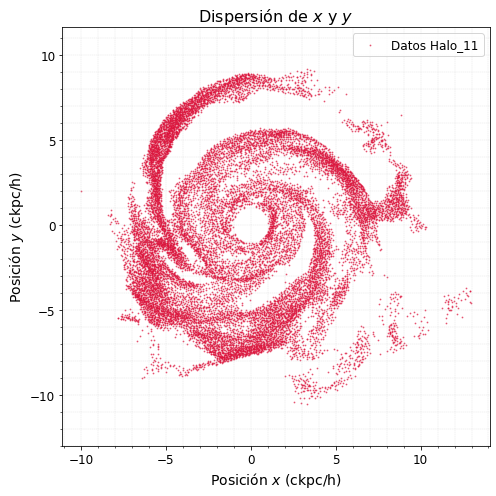

In [4]:
x = sorted_data['x']
y = sorted_data['y']

# Figura x,y halo
fig, ax = plt.subplots(figsize=(7, 7))

scatter = ax.scatter(x, y, c=h_alpha_color, s=0.7, alpha=0.6, label=f'Datos Halo_{id_halo}')

ax.set_title(r'Dispersión de $x$ y $y$', fontsize=16)
ax.set_xlabel(r'Posición $x$ (ckpc/h)', fontsize=14)
ax.set_ylabel(r'Posición $y$ (ckpc/h)', fontsize=14)
ax.legend(loc='best', fontsize=12)

ax.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.4)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.axis('equal')

plt.tight_layout()
plt.show()


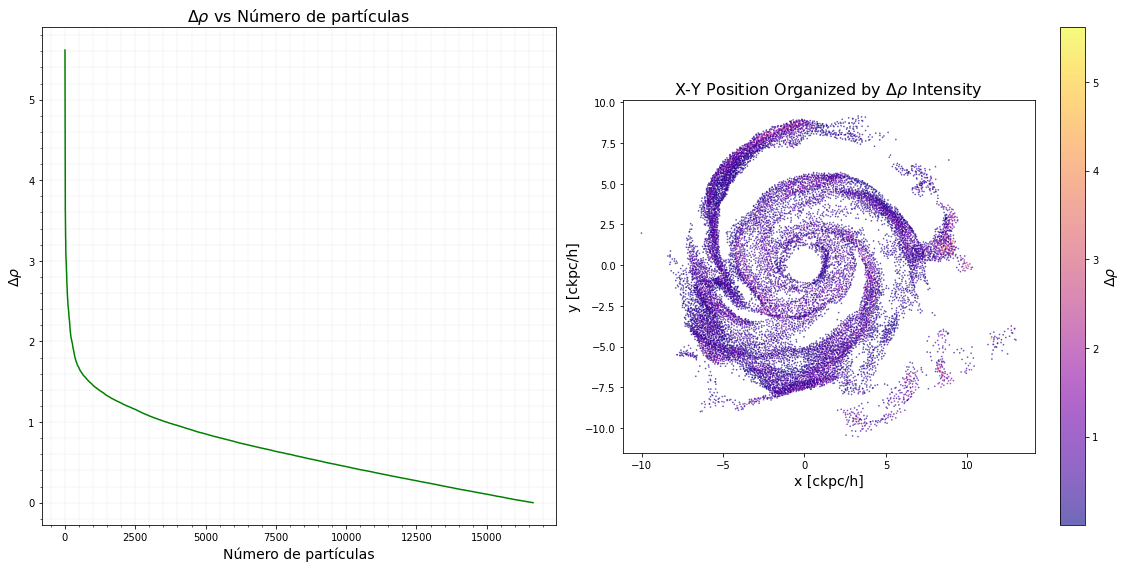

In [5]:
# Datos
x = sorted_data['x']
y = sorted_data['y']
delta_rho = sorted_data['deltaRho']
num_particles = range(1, len(delta_rho) + 1)

# Gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Primer gráfico: DeltaRho vs Número de partículas
ax1.plot(num_particles, delta_rho, color='g', linewidth=1.5)
ax1.set_title(r'$\Delta \rho$ vs Número de partículas', fontsize=16)
ax1.set_xlabel(r'Número de partículas', fontsize=14)
ax1.set_ylabel(r'$\Delta \rho$', fontsize=14)
ax1.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.4)
ax1.minorticks_on()

# Segundo gráfico: Posición X-Y de las partículas, organizadas por la intensidad de DeltaRho
scatter = ax2.scatter(x, y, c=delta_rho, cmap='plasma', s=0.5, alpha=0.6)
ax2.set_title(r'X-Y Position Organized by $\Delta \rho$ Intensity', fontsize=16)
ax2.set_xlabel('x [ckpc/h]', fontsize=14)
ax2.set_ylabel('y [ckpc/h]', fontsize=14)
ax2.set_aspect('equal', adjustable='box')

# Barra de color
cbar = fig.colorbar(scatter, ax=ax2, orientation='vertical')
cbar.set_label(r'$\Delta \rho$', fontsize=14)


plt.tight_layout()
plt.show()


## Cartesian to Polar Transformations
To transform Cartesian coordinates \((x, y)\) into polar coordinates \((r, $\phi$)\), we use the following mathematical relationships:

$$
r = \sqrt{x^2 + y^2}
$$

$$
\phi = \text{atan2}(y, x)
$$

Here, \( r \) is the radial distance from the origin, and \( $\phi$ \) is the angle (in radians) measured counterclockwise from the positive \(x\)-axis.


## Inverse Polar to Cartesian:
These transformations:

$$
x = r \cdot \cos(\phi)
$$
$$
y = r \cdot \sin(\phi)
$$


In [16]:
#funciones

def cartesian_to_polar(x, y):
    """
    Convert Cartesian coordinates (x, y) to polar coordinates (r, phi).
    
    Parameters:
    x : array-like
        x-coordinates.
    y : array-like
        y-coordinates.
    
    Returns:
    r : array-like
        Radial distance from the origin.
    phi : array-like
        Angle in radians.
    """
    # Calculate radial distance
    r = np.sqrt(x**2 + y**2)
    
    # Calculate the angle using atan2 (handles all quadrants)
    phi = np.arctan2(y, x)
    
    return r, phi


def polar_to_cartesian(r, phi):
    """
    Convert polar coordinates (r, phi) to Cartesian coordinates (x, y).
    
    Parameters:
    r : array-like
        Radial distance from the origin.
    phi : array-like
        Angle in radians.
    
    Returns:
    x : array-like
        x-coordinates.
    y : array-like
        y-coordinates.
    """
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    
    return x, y


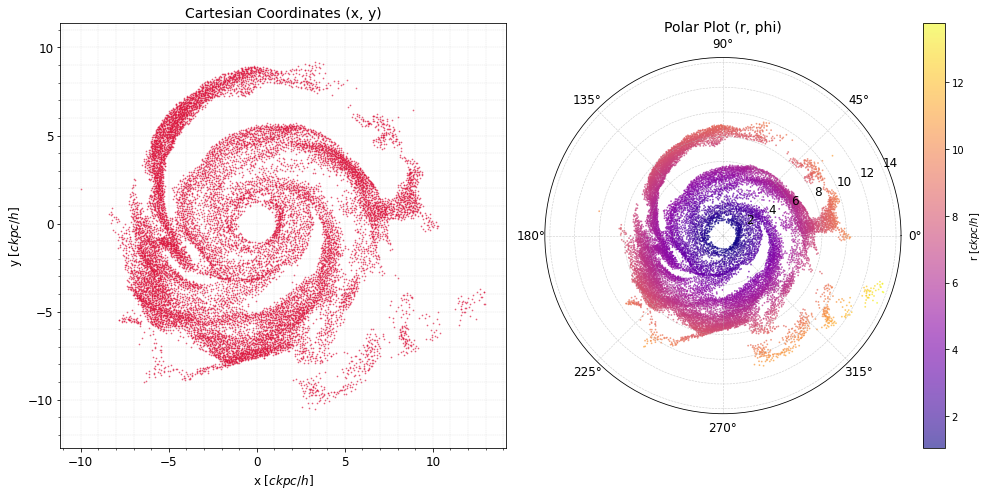

In [22]:

x_values_s = sorted_data['x'].values
y_values_s = sorted_data['y'].values

# Convert to polar coordinates
r_values, phi_values = cartesian_to_polar(x_values_s, y_values_s)

# Plotting the Cartesian and Polar Coordinates
fig = plt.figure(figsize=(14, 7))

# Plot Cartesian coordinates
ax1 = fig.add_subplot(121)
ax1.scatter(x_values_s, y_values_s, c=h_alpha_color, s=0.5, alpha=0.6)
ax1.set_title('Cartesian Coordinates (x, y)', fontsize=14)
ax1.set_xlabel('x [$\it{ckpc/h}$]', fontsize=12)
ax1.set_ylabel('y [$\it{ckpc/h}$]', fontsize=12)
ax1.set_aspect('equal')
ax1.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.4)
ax1.minorticks_on()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=10)
ax1.axis('equal')

# Plot Polar coordinates 
ax2 = fig.add_subplot(122, projection='polar')
sc = ax2.scatter(phi_values, r_values, c=r_values, cmap='plasma', s=0.7, alpha=0.6)
ax2.set_title('Polar Plot (r, phi)', fontsize=14)
ax2.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.6)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.colorbar(sc, ax=ax2, label='r [$\it{ckpc/h}$]')

plt.tight_layout()
plt.show()



## A new formula describing the scaffold structure of spiral galaxies

To replicate the formula presented in the article for spiral structures

$$
r(\phi) = \frac{A}{\log \left( B \tan \left( \frac{\phi}{2N} \right) \right)}
$$

Where:
- \( A \) is a scale parameter,
- \( B \) controls the bulge-to-arm size,
- \( N \) determines the spiral's tightness, and
- \( $\phi $\) is the polar angle.


- **`spiral_structure`** function takes the angle \( $\phi$ \), and parameters \( A \), \( B \), and \( N \) to compute the radial distance \( r($\phi$) \) for the spiral.

  
### Customization:
- You can adjust the parameters \( A \), \( B \), and \( N \) based on the specific galaxy morphology or dataset.
- The formula allows flexibility in fitting different types of spiral structures, and you can fine-tune these parameters to fit your galaxy data.



In [8]:
def spiral_structure(phi, A, B, N):
    """
    Calculate r(phi) based on the formula in the article.
    r(φ) = A / log(B * tan(φ / 2N))
    
    Parameters:
    phi : array-like
        Array of angle values in radians.
    A : float
        Scale parameter for the spiral.
    B : float
        Parameter that controls the bulge-to-arm size.
    N : float
        Winding number that controls the spiral's tightness.
    
    Returns:
    r : array-like
        Radial distances corresponding to the angle values.
    """
    r = A / np.log(B * np.tan(phi / (2 * N)))
    return r

The formula presented in the article is:

\[
r(\phi) = \frac{A}{\log \left( B \tan \left( \frac{\phi}{2N} \right) \right)}
\]

where:

- \( r \) is the radial distance (in polar coordinates),
- \( \phi \) is the angle in radians,
- \( A \) is a scaling factor (which you've mentioned is 1),
- \( B \) is a parameter controlling the bar-to-arm transition,
- \( N \) is the winding number that determines the pitch of the spiral.

### Inverse Transformation
To extract \( B \) and \( N \) given \( r \) and \( \phi \), we need to invert the formula.

1. **Start with the formula**:

   \[
   r = \frac{1}{\log \left( B \tan \left( \frac{\phi}{2N} \right) \right)}
   \]

2. **Take the logarithm** on both sides to eliminate the logarithmic term:

   \[
   \log \left( B \tan \left( \frac{\phi}{2N} \right) \right) = \frac{1}{r}
   \]

3. **Exponentiate both sides** to remove the logarithm:

   \[
   B \tan \left( \frac{\phi}{2N} \right) = e^{\frac{1}{r}}
   \]

4. **Solve for \( B \)**:

   \[
   B = \frac{e^{\frac{1}{r}}}{\tan \left( \frac{\phi}{2N} \right)}
   \]

   At this point, you can calculate \( B \) if you know \( N \).

5. **To isolate \( N \)**, you'll need to use the known values of \( r \), \( \phi \), and some initial guess for \( B \) (or a range of \( B \) values if you’re iterating over possible solutions). The equation doesn't allow for a simple closed-form solution for \( N \), but you could solve it numerically by rewriting it as:

   \[
   \frac{\phi}{2N} = \tan^{-1} \left( \frac{e^{\frac{1}{r}}}{B} \right)
   \]

   Which implies:

   \[
   N = \frac{\phi}{2 \tan^{-1} \left( \frac{e^{\frac{1}{r}}}{B} \right)}
   \]

### Numerical Estimation
To determine \( B \) and \( N \), we can use numerical methods like least squares fitting or optimization techniques such as gradient descent, based on your input values of \( r \) and \( \phi \). Given that the equation involves both \( B \) and \( N \), you might need to use a method that iterates over one variable while fitting the other.

Would you like to proceed with writing Python code to numerically estimate \( B \) and \( N \) using this approach?

In [40]:
# Load the data
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extract x and y values
x_values = data_arm['x'].values
y_values = data_arm['y'].values


x_values_s = sorted_data['x'].values
y_values_s = sorted_data['y'].values


# Convert to polar coordinates
r_values, phi_values = cartesian_to_polar(x_values, y_values)
r_values_s, phi_values_s = cartesian_to_polar(x_values_s, y_values_s)


array([ 0.63647752,  0.16162136, -0.29303782, -1.05941988, -2.08713773,
       -3.08951963,  2.53502624,  2.13758306,  1.85351748,  1.27594951,
        0.83267124,  0.617223  ,  0.37114679,  0.2546952 ,  0.02021999,
       -0.17593359, -0.39151828, -0.56852455, -0.7191105 , -0.86030311,
       -1.0386205 , -1.28758399, -1.44629657, -1.65195843, -1.93070128,
       -2.08229197, -2.25165934, -2.3663918 , -2.53370934, -2.6276584 ,
       -2.79859195, -3.00983683,  3.10650371])

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import RANSACRegressor
from sklearn.base import BaseEstimator, RegressorMixin

# Definir la función espiral logarítmica basada en la fórmula del artículo
def spiral_structure(phi, A, B, N):
    """
    Calcula r(φ) basado en la fórmula del artículo.
    """
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar phi negativo o cero
    r = A / np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6)  # Añadir un pequeño valor para evitar log(0)
    return r

# Crear una clase para encapsular el modelo de la espiral logarítmica para usar con RANSAC
class SpiralRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, initial_guess=[1.0, 1.0, 1.0]):
        self.initial_guess = initial_guess
        self.A_ = None
        self.B_ = None
        self.N_ = None

    def fit(self, phi, r):
        params, _ = curve_fit(spiral_structure, phi, r, p0=self.initial_guess)
        self.A_, self.B_, self.N_ = params
        return self

    def predict(self, phi):
        return spiral_structure(phi, self.A_, self.B_, self.N_)

# Crear una función de ajuste robusto usando RANSAC
def fit_spiral_with_ransac(phi_values, r_values, min_samples=50):
    ransac = RANSACRegressor(base_estimator=SpiralRegressor(),
                             min_samples=min_samples,
                             residual_threshold=0.5,  # Ajustar este valor según el ruido de los datos
                             max_trials=1000)
    
    # Ajustar los datos
    phi_values_reshaped = phi_values.reshape(-1, 1)
    ransac.fit(phi_values_reshaped, r_values)
    
    # Obtener el mejor modelo ajustado
    best_fit_model = ransac.estimator_
    return best_fit_model, ransac

# Convertir coordenadas cartesianas a polares
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return r, phi

# Cargar los datos
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extraer valores de x e y
x_values = data_arm['x'].values
y_values = data_arm['y'].values

# Convertir a coordenadas polares
r_values, phi_values = cartesian_to_polar(x_values, y_values)

# Ajustar usando RANSAC con el modelo de espiral
best_spiral_model, ransac = fit_spiral_with_ransac(phi_values, r_values, min_samples=30)

# Graficar los resultados
phi_fit = np.linspace(0, 2 * np.pi, 500)
r_fit = best_spiral_model.predict(phi_fit.reshape(-1, 1))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Graficar los puntos originales
sc = ax.scatter(phi_values, r_values, color='blue', label='Puntos de sobredensidad', s=1)

# Graficar el ajuste de la espiral
ax.plot(phi_fit, r_fit, label='Ajuste de espiral con RANSAC', color='red', linewidth=2)

ax.set_title('Ajuste Logarítmico con RANSAC para Puntos de Sobredensidad')
plt.legend()
plt.show()


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

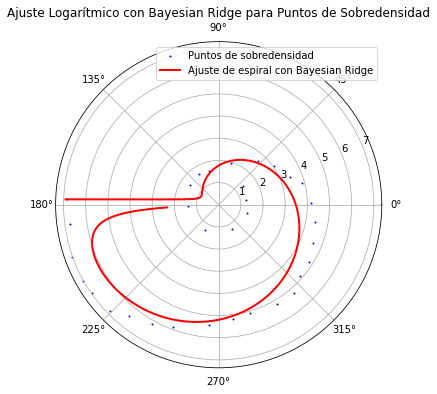

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import BayesianRidge

# Definir la función logarítmica de la espiral
def log_spiral(phi, B, N):
    """
    r(φ) = A / log(B * tan(φ / 2N))
    Suponemos A = 1 para simplificar
    """
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar log(0) o valores negativos
    return 1 / np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6)

# Crear un ajuste Bayesiano
class BayesianSpiralFitter:
    def __init__(self, alpha_1=1e-6, lambda_1=1e-6):
        self.bayesian_ridge = BayesianRidge(alpha_1=alpha_1, lambda_1=lambda_1)
        self.B_ = None
        self.N_ = None

    def fit(self, phi, r):
        # Preprocesar los valores de phi
        X = np.column_stack([phi, np.tan(phi / 2)])  # Crear características basadas en φ y tan(φ / 2)
        self.bayesian_ridge.fit(X, r)
        # Obtener los coeficientes ajustados
        self.B_ = self.bayesian_ridge.coef_[0]
        self.N_ = self.bayesian_ridge.coef_[1]

    def predict(self, phi):
        # Preprocesar phi
        X = np.column_stack([phi, np.tan(phi / 2)])
        return self.bayesian_ridge.predict(X)

# Función para convertir de coordenadas cartesianas a polares
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return r, phi

# Cargar los datos
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extraer los valores de x e y
x_values = data_arm['x'].values
y_values = data_arm['y'].values

# Convertir a coordenadas polares
r_values, phi_values = cartesian_to_polar(x_values, y_values)

# Ajustar el modelo bayesiano
bayesian_spiral = BayesianSpiralFitter()
bayesian_spiral.fit(phi_values, r_values)

# Predecir los valores ajustados
phi_fit = np.linspace(np.min(phi_values), np.max(phi_values), 1000)
r_fit = bayesian_spiral.predict(phi_fit)

# Graficar los resultados
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Graficar los puntos originales
ax.scatter(phi_values, r_values, color='blue', label='Puntos de sobredensidad', s=1)

# Graficar el ajuste de la espiral
ax.plot(phi_fit, r_fit, label='Ajuste de espiral con Bayesian Ridge', color='red', linewidth=2)

ax.set_title('Ajuste Logarítmico con Bayesian Ridge para Puntos de Sobredensidad')
plt.legend()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

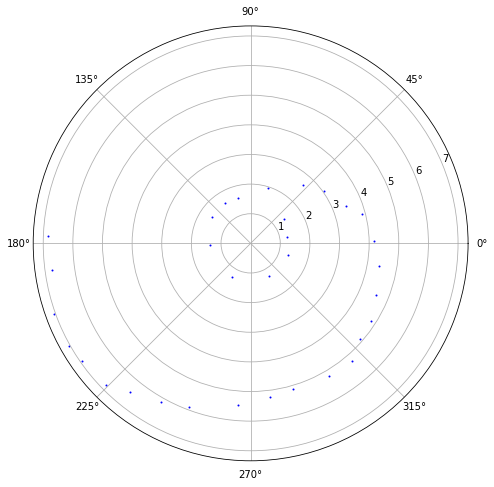

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import BayesianRidge

# Definir la función logarítmica de la espiral incluyendo A, B y N
def log_spiral(phi, A, B, N):
    """
    r(φ) = A / log(B * tan(φ / 2N))
    """
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar valores problemáticos para tan y log
    return A / np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6)

# Crear un ajuste Bayesiano
class BayesianSpiralFitter:
    def __init__(self, alpha_1=1e-6, lambda_1=1e-6):
        self.bayesian_ridge = BayesianRidge(alpha_1=alpha_1, lambda_1=lambda_1)
        self.A_ = None
        self.B_ = None
        self.N_ = None

    def fit(self, phi, r):
        # Preprocesar los valores de phi
        X = np.column_stack([phi, np.tan(phi / 2)])  # Crear características basadas en φ y tan(φ / 2)
        self.bayesian_ridge.fit(X, r)
        # Obtener los coeficientes ajustados
        self.A_ = self.bayesian_ridge.coef_[0]
        self.B_ = self.bayesian_ridge.coef_[1]
        self.N_ = self.bayesian_ridge.coef_[2]

    def predict(self, phi):
        # Preprocesar phi
        X = np.column_stack([phi, np.tan(phi / 2)])
        return self.bayesian_ridge.predict(X)

# Función para convertir de coordenadas cartesianas a polares
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return r, phi

# Cargar los datos
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extraer los valores de x e y
x_values = data_arm['x'].values
y_values = data_arm['y'].values

# Convertir a coordenadas polares
r_values, phi_values = cartesian_to_polar(x_values, y_values)

# Función para dividir los puntos en subconjuntos de 3 en 3
def divide_points_in_groups(r_values, phi_values, group_size=3):
    for i in range(0, len(r_values), group_size):
        yield r_values[i:i+group_size], phi_values[i:i+group_size]

# Ajustar y graficar para cada grupo de 3 puntos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Graficar los puntos originales
ax.scatter(phi_values, r_values, color='blue', label='Puntos de sobredensidad', s=1)

# Ajustar para cada conjunto de tres puntos
for r_group, phi_group in divide_points_in_groups(r_values, phi_values):
    if len(r_group) < 3:  # Asegurarnos de que haya 3 puntos en el grupo
        continue
    
    # Ajuste bayesiano para este subconjunto
    bayesian_spiral = BayesianSpiralFitter()
    bayesian_spiral.fit(phi_group, r_group)
    
    # Predecir los valores ajustados para este grupo
    phi_fit = np.linspace(np.min(phi_group), np.max(phi_group), 100)
    r_fit = bayesian_spiral.predict(phi_fit)
    
    # Graficar el ajuste para este subconjunto
    ax.plot(phi_fit, r_fit, label=f'Ajuste para puntos {phi_group[0]:.2f} a {phi_group[-1]:.2f}', linewidth=2)

ax.set_title('Ajuste Logarítmico para Grupos de Puntos de Sobredensidad')
plt.legend()
plt.show()


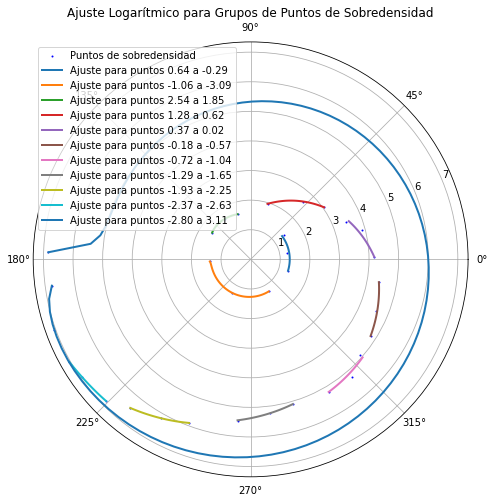

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import BayesianRidge

# Definir la función logarítmica de la espiral incluyendo A, B y N
def log_spiral(phi, A, B, N):
    """
    r(φ) = A / log(B * tan(φ / 2N))
    """
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar valores problemáticos para tan y log
    return A / np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6)

# Crear un ajuste Bayesiano
class BayesianSpiralFitter:
    def __init__(self, alpha_1=1e-6, lambda_1=1e-6):
        self.bayesian_ridge = BayesianRidge(alpha_1=alpha_1, lambda_1=lambda_1)
        self.A_ = None
        self.B_ = None
        self.N_ = None

    def fit(self, phi, r):
        # Preprocesar los valores de phi, ahora con tres características: φ, tan(φ/2) y tan(φ/2N)
        X = np.column_stack([phi, np.tan(phi / 2), np.tan(phi / 2)])  # Crear tres características
        self.bayesian_ridge.fit(X, r)
        # Obtener los coeficientes ajustados
        self.A_ = self.bayesian_ridge.coef_[0]
        self.B_ = self.bayesian_ridge.coef_[1]
        self.N_ = self.bayesian_ridge.coef_[2]

    def predict(self, phi):
        # Preprocesar phi
        X = np.column_stack([phi, np.tan(phi / 2), np.tan(phi / 2)])
        return self.bayesian_ridge.predict(X)

# Función para convertir de coordenadas cartesianas a polares
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return r, phi

# Cargar los datos
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extraer los valores de x e y
x_values = data_arm['x'].values
y_values = data_arm['y'].values

# Convertir a coordenadas polares
r_values, phi_values = cartesian_to_polar(x_values, y_values)

# Función para dividir los puntos en subconjuntos de 3 en 3
def divide_points_in_groups(r_values, phi_values, group_size=3):
    for i in range(0, len(r_values), group_size):
        yield r_values[i:i+group_size], phi_values[i:i+group_size]

# Ajustar y graficar para cada grupo de 3 puntos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Graficar los puntos originales
ax.scatter(phi_values, r_values, color='blue', label='Puntos de sobredensidad', s=1)

# Ajustar para cada conjunto de tres puntos
for r_group, phi_group in divide_points_in_groups(r_values, phi_values):
    if len(r_group) < 3:  # Asegurarnos de que haya 3 puntos en el grupo
        continue
    
    # Ajuste bayesiano para este subconjunto
    bayesian_spiral = BayesianSpiralFitter()
    bayesian_spiral.fit(phi_group, r_group)
    
    # Predecir los valores ajustados para este grupo
    phi_fit = np.linspace(np.min(phi_group), np.max(phi_group), 100)
    r_fit = bayesian_spiral.predict(phi_fit)
    
    # Graficar el ajuste para este subconjunto
    ax.plot(phi_fit, r_fit, label=f'Ajuste para puntos {phi_group[0]:.2f} a {phi_group[-1]:.2f}', linewidth=2)

ax.set_title('Ajuste Logarítmico para Grupos de Puntos de Sobredensidad')
plt.legend()
plt.show()


In [80]:
# Asegurarse de que los valores de phi están en el rango correcto
phi_multiple_points = np.mod(phi_multiple_points, 2*np.pi)
phi_multiple_points

array([0.63647752, 0.16162136, 5.99014749, 5.22376543, 4.19604758,
       3.19366568, 2.53502624, 2.13758306, 1.85351748, 1.27594951,
       0.83267124, 0.617223  , 0.37114679, 0.2546952 , 0.02021999,
       6.10725171, 5.89166703, 5.71466076, 5.56407481, 5.42288219,
       5.24456481, 4.99560132, 4.83688873, 4.63122688, 4.35248403,
       4.20089334, 4.03152597, 3.91679351, 3.74947596, 3.65552691,
       3.48459336, 3.27334848, 3.10650371])

In [82]:
# Filtrar los puntos de sobredensidad, asumiendo que hay un umbral de deltaRho o una condición para los puntos azules
# Ajusta el umbral de densidad de acuerdo a tus datos
sobredensidad_threshold = 0.8 * np.max(r_multiple_points)  # Filtra puntos por densidad

# Filtrar los puntos en función de deltaRho
r_sobredensidad = r_multiple_points[deltaRho > sobredensidad_threshold]
phi_sobredensidad = phi_multiple_points[deltaRho > sobredensidad_threshold]

# Ajustar sobre estos puntos
B_fit, N_fit = fit_log_spiral_multiple_points_iteratively(r_sobredensidad, phi_sobredensidad, initial_guess)




# Visualización mejorada solo con los puntos de sobredensidad
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
sc = ax.scatter(phi_sobredensidad, r_sobredensidad, c=r_sobredensidad, cmap='plasma', s=20, alpha=0.8, label='Puntos de sobredensidad')
ax.plot(phi_fit, r_fit, label=f'Ajuste logarítmico B={B_fit:.2f}, N={N_fit:.2f}', color='r', linewidth=2)
ax.set_title('Ajuste Logarítmico con Puntos Filtrados de Sobredensidad')
plt.colorbar(sc, label=r'$r \ [\mathrm{kpc}]$')
plt.legend()
plt.show()


NameError: name 'deltaRho' is not defined

Parámetros ajustados para múltiples puntos: B = 0.01, N = 10.0


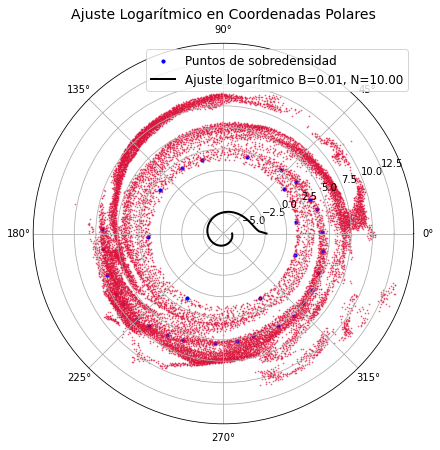

In [59]:
from scipy.optimize import minimize

# Load the data
data_arm = pd.read_csv('../DATA/processed/TracingPoints/arm_tracing_11_arm1_rho_dani.csv')

# Extract x and y values
x_values = data_arm['x'].values
y_values = data_arm['y'].values


x_values_s = sorted_data['x'].values
y_values_s = sorted_data['y'].values


# Convert to polar coordinates
r_values, phi_values = cartesian_to_polar(x_values, y_values)
r_values_s, phi_values_s = cartesian_to_polar(x_values_s, y_values_s)

def log_spiral(phi, B, N):
    A = 30
    # Añadir un factor adicional de suavizado en el ajuste
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar phi negativo o 0
    return 1 *A / (np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6) + 1)  # +1 para evitar valores muy pequeños


def objective(params, phi_values, r_values):
    B, N = params
    r_pred = log_spiral(phi_values, B, N)
    return np.sum((r_pred - r_values)**2)  # Error cuadrático entre el modelo y los datos

def fit_log_spiral_with_minimize(r_values, phi_values, initial_guess):
    result = minimize(objective, initial_guess, args=(phi_values, r_values), bounds=[(0.01, 10.0), (0.01, 10.0)])
    return result.x


# Valores iniciales (r y phi)
r_multiple_points = r_values  # Lista de valores r
phi_multiple_points = phi_values  # Lista de valores phi
initial_guess = [0.5, 4]  # Adivinanza inicial de los parámetros B y N

# Usar la función `minimize` para el ajuste
B_fit, N_fit = fit_log_spiral_with_minimize(r_multiple_points, phi_multiple_points, initial_guess)


# Imprimir los parámetros ajustados
print(f"Parámetros ajustados para múltiples puntos: B = {B_fit}, N = {N_fit}")

# Graficar el ajuste logarítmico en coordenadas polares
phi_fit = np.linspace(0, 2*np.pi, 100)  # Asegurar que cubrimos todo el rango de phi
r_fit = log_spiral(phi_fit, B_fit, N_fit)

# Crear la figura con dos subplots: el ajuste polar y los puntos de sobredensidad
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))

# Graficar los puntos de sobredensidad en coordenadas polares
ax.scatter(phi_multiple_points, r_multiple_points, color='blue', s=10, label='Puntos de sobredensidad')
ax.scatter( phi_values_s,r_values_s, c=h_alpha_color, s=0.5, alpha=0.6)

# Graficar el ajuste logarítmico en coordenadas polares
ax.plot(phi_fit, r_fit, color='k', label=f'Ajuste logarítmico B={B_fit:.2f}, N={N_fit:.2f}', lw=2)

# Etiquetas y leyenda
ax.set_title('Ajuste Logarítmico en Coordenadas Polares', fontsize=14)
ax.legend(loc='upper right', fontsize=12)

# Mostrar la gráfica
#plt.tight_layout()
plt.show()




Iteración 1: B = 0.9507305921701783, N = 1.0024410173950238
Iteración 2: B = 0.9507305921701783, N = 1.0024410173950238
Convergencia alcanzada en iteración 2.
Parámetros ajustados finales: B = 0.9507305921701783, N = 1.0024410173950238


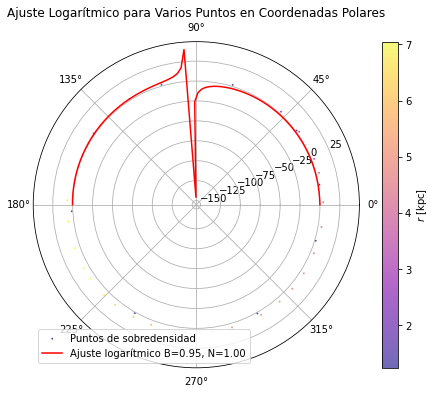

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función logarítmica para ajustar
def log_spiral(phi, B, N):
    safe_phi = np.clip(phi, 1e-6, None)  # Evitar log(0) o valores negativos
    return 1 / (np.log(B * np.tan(safe_phi / (2 * N)) + 1e-6))

# Función para ajustar el modelo a varios puntos de sobredensidad
def fit_log_spiral_multiple_points_iteratively(r_values, phi_values, initial_guess, max_iters=15000, tol=1e-36):
    B_current, N_current = initial_guess  # Valores iniciales
    for i in range(max_iters):
        try:
            # Ajuste usando curve_fit para múltiples puntos
            params, _ = curve_fit(log_spiral, phi_values, r_values, p0=[B_current, N_current], maxfev=10000)
            B_new, N_new = params
            
            # Mostrar los valores actuales en cada iteración
            print(f"Iteración {i+1}: B = {B_new}, N = {N_new}")
            
            # Verificar si la diferencia es menor que la tolerancia
            if np.abs(B_new - B_current) < tol and np.abs(N_new - N_current) < tol:
                print(f"Convergencia alcanzada en iteración {i+1}.")
                break
            
            # Actualizar los valores actuales
            B_current, N_current = B_new, N_new
            
        except RuntimeError:
            print(f"No se pudo ajustar en la iteración {i+1}, se mantiene el último valor.")
    
    # Devolver los últimos valores ajustados
    return B_current, N_current

# Valores iniciales (r y phi son tus datos convertidos)
r_multiple_points = r_values  # Lista de valores r
phi_multiple_points = phi_values  # Lista de valores phi
initial_guess = [1.0, 1.0]  # Adivinanza inicial de los parámetros B y N

# Ajustar el modelo iterativamente
B_fit, N_fit = fit_log_spiral_multiple_points_iteratively(r_multiple_points, phi_multiple_points, initial_guess)

# Imprimir los parámetros ajustados
print(f"Parámetros ajustados finales: B = {B_fit}, N = {N_fit}")

# Graficar el ajuste
phi_fit = np.linspace(0, np.pi, 100)
r_fit = log_spiral(phi_fit, B_fit, N_fit)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
sc = ax.scatter(phi_multiple_points, r_multiple_points, c=r_multiple_points, cmap='plasma', s=1, alpha=0.6, label='Puntos de sobredensidad')
ax.plot(phi_fit, r_fit, label=f'Ajuste logarítmico B={B_fit:.2f}, N={N_fit:.2f}', color='r')
ax.set_title('Ajuste Logarítmico para Varios Puntos en Coordenadas Polares')
plt.colorbar(sc, label=r'$r \ [\mathrm{kpc}]$')
plt.legend()
plt.show()


In [10]:
def spiral_structure(phi, A, B, N):
    """
    Calculate r(phi) based on the formula in the article.
    r(φ) = A / log(B * tan(φ / 2N))
    
    Parameters:
    phi : array-like
        Array of angle values in radians.
    A : float
        Scale parameter for the spiral.
    B : float
        Parameter that controls the bulge-to-arm size.
    N : float
        Winding number that controls the spiral's tightness.
    
    Returns:
    r : array-like
        Radial distances corresponding to the angle values.
    """
    r = A / np.log(B * np.tan(phi / (2 * N)))
    return r

# Parameters (adjust as necessary)
A = 10   # Scale factor
B = 1.5  # Bulge-to-arm size parameter
N = 5    # Winding number

# Define phi values ranging from 0 to 2*pi for the spiral
phi = np.linspace(0.1, 2 * np.pi, 1000)

# Calculate the corresponding r values
r_values = spiral_structure(polar_data['theta'][0:1000], A, B, N)

# Convert to Cartesian coordinates for plotting
x_values = r_values * np.cos(polar_data['theta'][0:1000])
y_values = r_values * np.sin(polar_data['theta'][0:1000])

# Plotting the spiral structure
plt.figure(figsize=(8, 8))
plt.scatter(x_values, y_values, label=f'A={A}, B={B}, N={N}')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Spiral Structure based on Custom Formula')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'polar_data' is not defined

In [ ]:
def convert_to_polar(data):
    polar_data = data.copy()
    # El centro de la galaxia está en (0, 0, 0)
    polar_data['r'] = np.sqrt(data['x']**2 + data['y']**2)
    polar_data['theta'] = np.arctan2(data['y'], data['x'])
    return polar_data

polar_data = convert_to_polar(sorted_data)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Function to compute the model: r(phi)
def model_r(phi, B, N):
    return 1 / np.log(B * np.tan(phi / (2 * N)))

# Loss function to minimize
def residuals(params, phi_data, r_data):
    B, N = params
    r_model = model_r(phi_data, B, N)
    return r_data - r_model

# Example dataset (r, phi)
phi_data = np.linspace(0.1, 10, 50)  # Replace with actual data
r_data = 1 / np.log(3 * np.tan(phi_data / 4))  # Example data for B=3, N=4

# Initial guess for B and N
initial_guess = [1.0, 1.0]

# Use least squares to find the best-fit B and N
result = least_squares(residuals, initial_guess, args=(phi_data, r_data))

# Extract the estimated B and N
B_est, N_est = result.x
print(f"Estimated B: {B_est}, Estimated N: {N_est}")

# Plot the data and the fitted model
plt.figure(figsize=(8, 6))
plt.scatter(phi_data, r_data, label='Observed Data', color='blue')
plt.plot(phi_data, model_r(phi_data, B_est, N_est), label=f'Fitted Model (B={B_est:.2f}, N={N_est:.2f})', color='red')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$r(\phi)$')
plt.title('Fitting r(phi) using Numerical Optimization')
plt.legend()
plt.grid(True)
plt.show()


/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


ValueError: Residuals are not finite in the initial point.

In [ ]:
r_data = sorted_data['Rs']


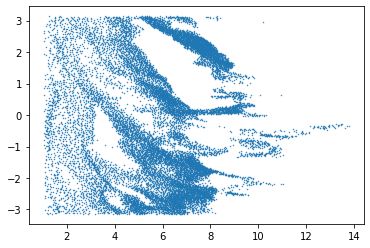

In [80]:
plt.scatter(r_data,polar_data['theta'] , s=0.2) 

In [72]:
def walk_through_particles(data):
    # Aquí irías recorriendo las partículas y haciendo un análisis del gradiente de deltaRho
    
    
    particle_paths = []
    for i, particle in data.iterrows():
        # Puedes añadir condiciones o análisis adicionales de la trayectoria de cada partícula
        
        
        particle_paths.append(particle)
    return particle_paths

# Ejemplo de uso:
particle_paths = walk_through_particles(sorted_data)


In [70]:
import skimage
print(skimage.__version__)


0.14.0


In [71]:


# Crear una malla 2D a partir de los datos
# Supongamos que tienes tus datos de x, y, y deltaRho en sorted_data
x = sorted_data['x']
y = sorted_data['y']
delta_rho = sorted_data['deltaRho']

# Crear una grilla 2D de densidad (usando histograma 2D o interpolación)
grid_size = 100  # Ajustar el tamaño de la malla
H, xedges, yedges = np.histogram2d(x, y, bins=grid_size, weights=delta_rho)

# Suavizar la función de densidad
smoothed_density = ndi.gaussian_filter(H, sigma=1.0)

# Detectar máximos locales
local_maxi = peak_local_max(smoothed_density, indices=False, footprint=np.ones((3, 3)))

# Generar un marcador para el algoritmo de Watershed
markers, _ = ndi.label(local_maxi)

# Aplicar el Watershed transform
labels = watershed(-smoothed_density, markers, mask=smoothed_density)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.imshow(smoothed_density, cmap='plasma', origin='lower')
plt.contour(labels, colors='white', linewidths=1)
plt.colorbar(label='Densidad $\Delta \rho$')
plt.title('Segmentation using Watershed Transform')
plt.xlabel('X [kpc]')
plt.ylabel('Y [kpc]')
plt.show()


NameError: name 'peak_local_max' is not defined